In [8]:
import numpy as np
import chilife as xl

# Fetch maltodextrin binding protein structure from the PDB
protein = xl.fetch('1omp')

# Create spin labels using the off-rotamer sampling method
SL1 = xl.SpinLabel('R1M', 238, protein, sample=10000)
SL2 = xl.SpinLabel('R1M', 275, protein, sample=10000)

# Save spin labels and protein structure
xl.save('1omp_S238R1_L275R1.pdb', SL1, SL2, protein)

# Create spin labels using the rotamer library method 
SL1rl = xl.SpinLabel.from_mmm('R1M', 238, protein)
SL2rl = xl.SpinLabel.from_mmm('R1M', 275, protein)

# Create spin labels using the accessible volume method 
SL1av = xl.SpinLabel.from_wizard('R1M', 238, protein)
SL2av = xl.SpinLabel.from_wizard('R1M', 275, protein)

# Predict distance distributions over an experimental axis
r, Pexp, Plb, Pub = np.loadtxt('Exp_Data.txt')
P = xl.distance_distribution(SL1, SL2, r=r)
Prl = xl.distance_distribution (SL1rl, SL2rl, r=r)
Pav = xl.distance_distribution (SL1av, SL2av, r=r)


  dt=self.trajectory.ts.dt * step,



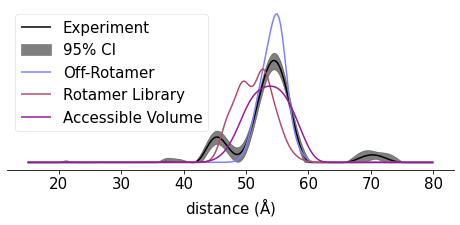

In [12]:
plt.style.use('chiLife')
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(r, Pexp, label='Experiment', color='k')
ax.fill_between(r, Plb, Pub, alpha=0.5, label="95% CI", color='k')

ax.plot(r, P, label='Off-Rotamer')
ax.plot(r, Prl, label='Rotamer Library')
ax.plot(r, Pav, label='Accessible Volume')


ax.set_yticks([])
ax.set_xlabel(r'distance ($\rm\AA$)')
ax.legend()
for spine in ['left', 'top', 'right']:
    ax.spines[spine].set_visible(False)

plt.show()
fig.savefig('MBP S238R1 L275R1_Pr.png', bbox_inches='tight', dpi=1000)
